In [1]:
FluTrain = read.csv("FluTrain.csv")

In [2]:
subset(FluTrain, ILI == max(ILI))

,Week,ILI,Queries
,<fct>,<dbl>,<dbl>
303,2009-10-18 - 2009-10-24,7.618892,1


In [3]:
subset(FluTrain, Queries == max(Queries))

,Week,ILI,Queries
,<fct>,<dbl>,<dbl>
303,2009-10-18 - 2009-10-24,7.618892,1


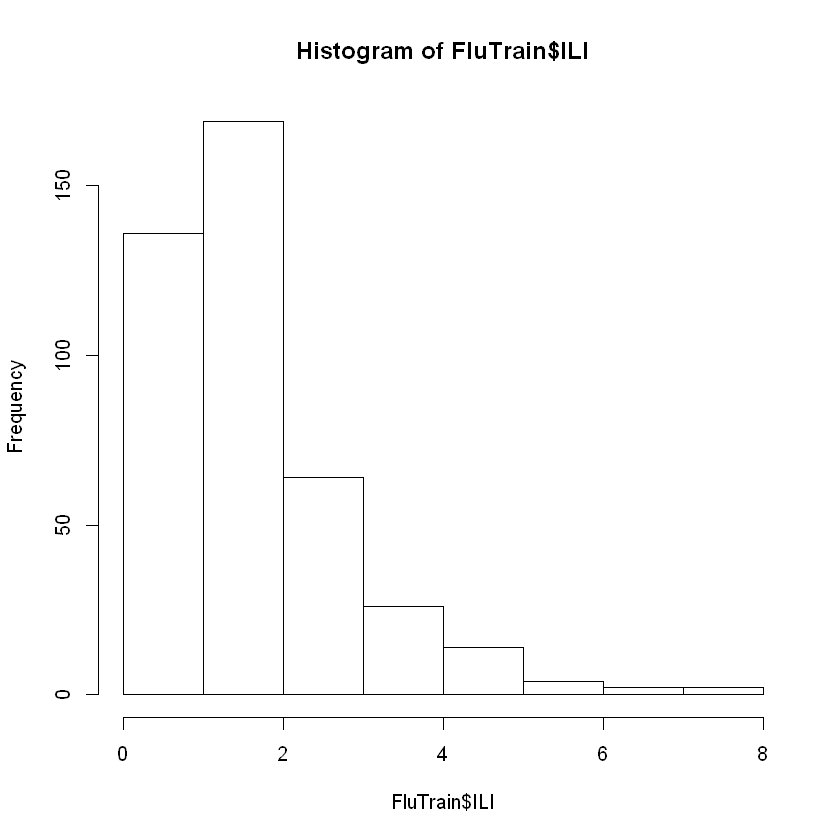

In [4]:
hist(FluTrain$ILI)

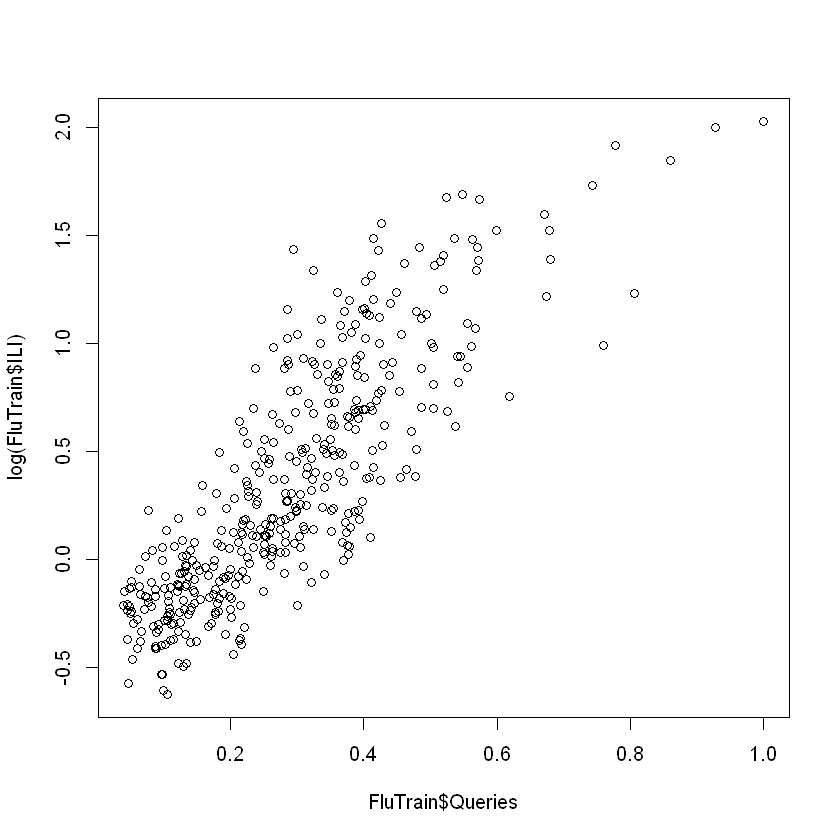

In [5]:
plot(FluTrain$Queries, log(FluTrain$ILI))

In [6]:
FluTrend1 = lm(log(ILI)~Queries, data=FluTrain)

In [7]:
summary(FluTrend1)


Call:
lm(formula = log(ILI) ~ Queries, data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76003 -0.19696 -0.01657  0.18685  1.06450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49934    0.03041  -16.42   <2e-16 ***
Queries      2.96129    0.09312   31.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2995 on 415 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.7083 
F-statistic:  1011 on 1 and 415 DF,  p-value: < 2.2e-16


In [8]:
Correlation = cor(FluTrain$Queries, log(FluTrain$ILI))

In [9]:
Correlation^2

[1] 0.7090201

In [10]:
log(1/Correlation)

[1] 0.1719357

In [11]:
exp(-0.5*Correlation) 

[1] 0.6563792

In [13]:
FluTest = read.csv("FluTest.csv")

In [14]:
PredTest1 = exp(predict(FluTrend1, newdata=FluTest))

In [15]:
which(FluTest$Week == "2012-03-11 - 2012-03-17")

[1] 11

In [16]:
PredTest1[11] 

11 
2.187378

In [17]:
(2.293422 - 2.187378)/2.293422

[1] 0.04623833

In [18]:
SSE = sum((PredTest1-FluTest$ILI)^2)

In [19]:
RMSE = sqrt(SSE / nrow(FluTest))
RMSE

[1] 0.7490645

In [20]:
library(zoo)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [21]:
ILILag2 = lag(zoo(FluTrain$ILI), -2, na.pad=TRUE)

In [22]:
FluTrain$ILILag2 = coredata(ILILag2)

In [23]:
summary(FluTrain$ILILag2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.5341  0.9010  1.2519  1.6754  2.0580  7.6189       2 

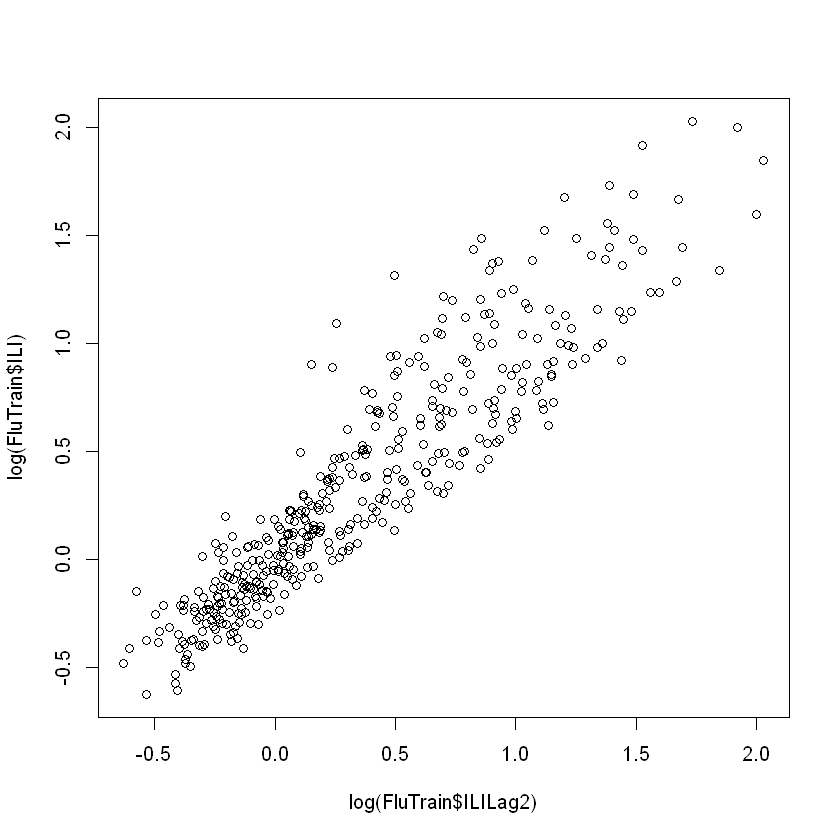

In [24]:
plot(log(FluTrain$ILILag2), log(FluTrain$ILI))

In [25]:
FluTrend2 = lm(log(ILI)~Queries+log(ILILag2), data=FluTrain)

In [26]:
summary(FluTrend2)


Call:
lm(formula = log(ILI) ~ Queries + log(ILILag2), data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52209 -0.11082 -0.01819  0.08143  0.76785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.24064    0.01953  -12.32   <2e-16 ***
Queries       1.25578    0.07910   15.88   <2e-16 ***
log(ILILag2)  0.65569    0.02251   29.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1703 on 412 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9063,	Adjusted R-squared:  0.9059 
F-statistic:  1993 on 2 and 412 DF,  p-value: < 2.2e-16


In [27]:
ILILag2 = lag(zoo(FluTest$ILI), -2, na.pad=TRUE)

In [28]:
FluTest$ILILag2 = coredata(ILILag2)

In [29]:
summary(FluTest$ILILag2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.9018  1.1359  1.3409  1.5188  1.7606  3.6002       2 

In [30]:
FluTest$ILILag2[1] = FluTrain$ILI[416]

FluTest$ILILag2[2] = FluTrain$ILI[417]

In [31]:
FluTest$ILILag2[1]

[1] 1.852736

In [32]:
FluTest$ILILag2[2]

[1] 2.12413

In [33]:
PredTest2 = exp(predict(FluTrend2, newdata=FluTest))

In [34]:
SSE = sum((PredTest2-FluTest$ILI)^2)

RMSE = sqrt(SSE / nrow(FluTest))

RMSE

[1] 0.2942029